In [1]:
#importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import yfinance as yf

###Exponential Smoothing techniques are powerful for time series forecasting, especially when dealing with trend and seasonality. These models weigh recent observations more heavily, allowing quick adaptation to new patterns.

We’ll use Holt-Winters Exponential Smoothing, which supports:

Level (current value)

Trend (direction of the data)

Seasonality (recurring patterns)

In [2]:
# Load dataset: monthly airline passengers (or use stock for non-seasonal)
df = yf.download("MSFT", start="2020-01-01", end="2025-06-16")
data = df["Close"].resample("M").mean()  # monthly average

<ipython-input-2-36545699>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("MSFT", start="2020-01-01", end="2025-06-16")
[*********************100%***********************]  1 of 1 completed
<ipython-input-2-36545699>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = df["Close"].resample("M").mean()  # monthly average


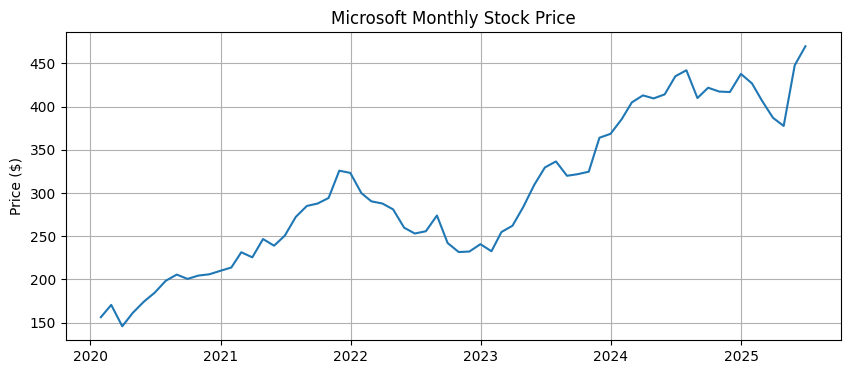

In [3]:
# Plot original data
plt.figure(figsize=(10, 4))
plt.plot(data, label="Monthly Avg Close")
plt.title("Microsoft Monthly Stock Price")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


In [4]:
# Applying Holt-Winters: additive trend, no seasonality
model = ExponentialSmoothing(data, trend='add', seasonal=None)
model_fit = model.fit()


In [5]:
# Forecast 7 future points
forecast = model_fit.forecast(steps=7)


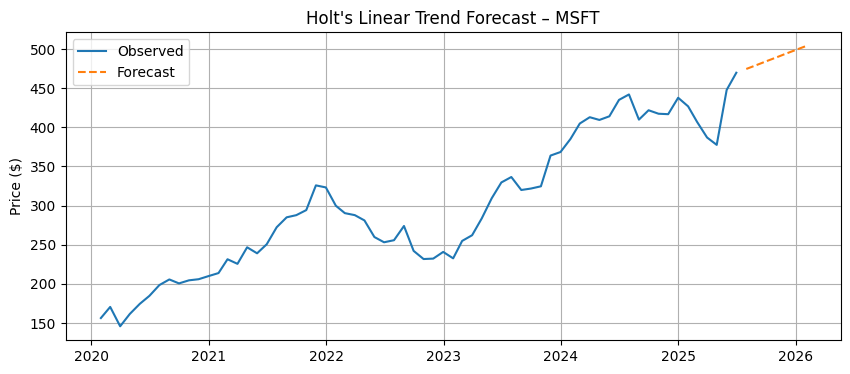

In [6]:
# Plot results
plt.figure(figsize=(10, 4))
plt.plot(data, label="Observed")
plt.plot(forecast, label="Forecast", linestyle='--')
plt.title("Holt's Linear Trend Forecast – MSFT")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()